# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0815 22:37:21.611630  9380 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0815 22:37:21.779609  9380 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.2868 - acc: 0.1388 - val_loss: 2.3060 - val_acc: 0.0998
Epoch 2/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.3120 - acc: 0.1005 - val_loss: 2.3049 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.3047 - acc: 0.0994 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.3044 - acc: 0.0987 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.3049 - acc: 0.0995 - val_loss: 2.3049 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.3040 - acc: 0.0986 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.1597 - acc: 0.1551 - val_loss: 2.1686 

50000/50000 [==============================] - 12s 247us/step - loss: 1.8285 - acc: 0.3470 - val_loss: 1.7080 - val_acc: 0.3997
Epoch 2/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.6005 - acc: 0.4341 - val_loss: 1.6935 - val_acc: 0.4055
Epoch 3/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.5131 - acc: 0.4647 - val_loss: 1.5134 - val_acc: 0.4600
Epoch 4/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.4484 - acc: 0.4846 - val_loss: 1.4641 - val_acc: 0.4772
Epoch 5/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.3972 - acc: 0.5065 - val_loss: 1.4649 - val_acc: 0.4787
Epoch 6/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.3610 - acc: 0.5165 - val_loss: 1.4261 - val_acc: 0.4910
Epoch 7/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.3213 - acc: 0.5311 - val_loss: 1.3979 - val_acc: 0.5057
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.8048 - acc: 0.3693 - val_loss: 1.7576 - val_acc: 0.3853
Epoch 3/50
50000/50000 [==============================] - 16s 310us/step - loss: 1.7248 - acc: 0.3985 - val_loss: 1.6892 - val_acc: 0.4118
Epoch 4/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.6645 - acc: 0.4201 - val_loss: 1.6422 - val_acc: 0.4270
Epoch 5/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.6164 - acc: 0.4352 - val_loss: 1.6122 - val_acc: 0.4365
Epoch 6/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.5758 - acc: 0.4485 - val_loss: 1.5697 - val_acc: 0.4476
Epoch 7/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.5409 - acc: 0.4608 - val_loss: 1.5487 - val_acc: 0.4527
Epoch 8/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.5113 - acc: 0.4712 - val_loss: 1.5148 - val_acc: 0.4637
Epoch 9/50
50000/50000 [===

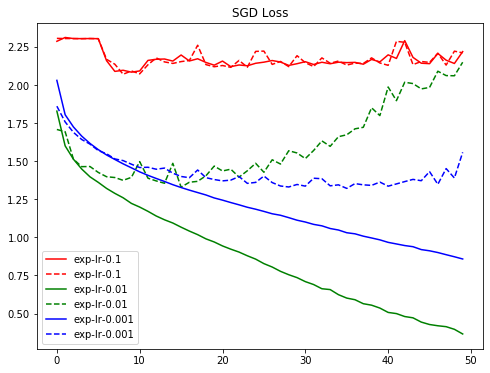

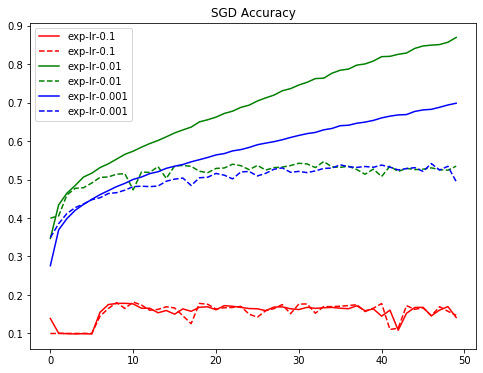

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("SGD Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("SGD Accuracy")
plt.legend()
plt.show()